DESIGNING A NEURAL NETWORK FROM SCRATCH


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

Modelling a single perceptron without any activation function

In [2]:
input = [2.4 , 4.5 ,7.8 ]
weights = [9.8 , 7.1 , 3.1]
bias = 4

In [3]:
output = input[0]*weights[0] + input[1]*weights[1] + input[2]*weights[2] + bias
print(output)

83.65


In [4]:
input = [2.4 , 4.5 ,7.8 , 3.0]
weights = [9.8 , 7.1 , 3.1 , 1.0]
bias = 2
output = input[0]*weights[0] + input[1]*weights[1] + input[2]*weights[2] + input[3]*weights[3] + bias
print(output)

84.65


Modelling a layer of 3 perceptrons/Neurons

In [5]:
inputs = [2.4 , 4.5 ,7.8 , 3.0]
weights1 = [9.8 , 7.1 , 3.1 , 1.0]
weights2 = [3.8 ,6.1 , 0.17 , 6.0]
weights3 = [2.3 , -9.1 , 4.3 , 7.0]
bias1 = 2.0
bias2 = 3.0
bias3 = 1.0
output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,  
        inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
            inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)

[84.65, 58.896, 20.110000000000007]


In [6]:
weights = [weights1 , weights2 , weights3]
biases = [bias1 , bias2, bias3]
print(weights)

[[9.8, 7.1, 3.1, 1.0], [3.8, 6.1, 0.17, 6.0], [2.3, -9.1, 4.3, 7.0]]


Same thing but with a bit of flair

In [7]:
layer_outputs = []
for neuron_weights , neuron_bias in zip(weights,biases):
    neuron_output = 0
    for n_input , weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
    
print(layer_outputs)   

[84.65, 58.896, 20.110000000000007]


Indroducing the dot product:
inputs = [2.4 , 4.5 ,7.8 , 3.0]
weightsd = [9.8 , 7.1 , 3.1 , 1.0]
np.dot(inputs,weightsd)
= 2.4*9.8 + 4.5*7.1 + 7.8*3.1 + 3.0*1.0

In [8]:
#Single Neuron
weightsd = [9.8 , 7.1 , 3.1 , 1.0]
biasd = 2.0
outputd = np.dot(inputs,weightsd) + bias
print(outputd)
#Since both input and weightsd are vectors the order of dot products doesn't matter
outputd1 = np.dot(weightsd,inputs) + bias
print(outputd1)

84.65
84.65


In [9]:
#layer of 3 neurons
# input is a vector
# weights is a matrix
# here order matters , XW' + b , shapes matter in matrix multiplication
output_lay = np.dot(inputs, np.array(weights).T) + biases
print(output_lay)

[84.65  58.896 20.11 ]


In matrix multiplication the only necessary requirement is the number of columns of the first matrix should be the same as the number of rows of the sencond matrix (mxn * nxp = mxp)
Here the weights is a 3x4 matrix and inputs is a 1x4 so we do a transpose on the input vector x to make it 4x1. 
        In programming languages we have arrays and in numpy the shapes work a bit differently here the shape of the input vector is (4,)
        and the shape of the weight matrix is (3,4). So if we do np.dot(inputs,weights) we    get:

ValueError                                Traceback (most recent call last)
<ipython-input-18-73e909785698> in <module>
      3 # weights is a matrix
      4 # here order matters , Wx+b
----> 5 output_lay = np.dot(inputs, weights) + biases
      6 print(output_lay)

<__array_function__ internals> in dot(*args, **kwargs)

ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)


Taking inputs a batches of vectors rather than a single vector.
We use batches for parallel computing.
Batches helps with generalization
Batch size shouldn't be too large(the whole dataset) otherwise you may be overfitting

In [10]:
inpbatch = [[2.4 , 4.5 ,7.8 , 3.0],
            [2.0,3.0,8.0,4.6],
            [-1.4,3.3,4.1,0.17]]

wtbatch = [[9.8 , 7.1 , 3.1 , 1.0],
            [3.8 ,6.1 , 0.17 , 6.0], 
            [2.3 , -9.1 , 4.3 , 7.0]]

biasbatch = [2.0 , 4.0, 8.9]
#Matrix multiplication:
output1 = np.dot(inpbatch,np.array(wtbatch).T) + biasbatch
print(output)


[84.65, 58.896, 20.110000000000007]


In [11]:
inpbatch = [[2.4 , 4.5 ,7.8 , 3.0],
            [2.0,3.0,8.0,4.6],
            [-1.4,3.3,4.1,0.17]]

wtbatch = [[9.8 , 7.1 , 3.1 , 1.0],
            [3.8 ,6.1 , 0.17 , 6.0], 
            [2.3 , -9.1 , 4.3 , 7.0]]

biasbatch = [2.0 , 4.0, 8.9]
#2nd layer:
inpbatch2 = [[84.65 , 59.896 ,28.01 ],
            [72.3  , 58.86 , 52.8  ],
            [24.59 , 20.527, -5.53 ]]

wtbatch2 = [[2.8 , 8.1 , 1.1 ],
            [0.8 ,0.16 , 0.17 ], 
            [-3.3 , 0.1 , 4.3 ]]

biasbatch2 = [2.0 , 3.0, 0.9]
output2 = np.dot(inpbatch2,np.array(wtbatch2).T) + biasbatch
print(output2)


[[ 754.9886    86.06506 -144.0124 ]
 [ 739.286     80.2336     3.236  ]
 [ 231.0377    26.01622  -93.9733 ]]


Same thing but directly connecting both the layers


In [12]:
output2 = np.dot(output,np.array(wtbatch2).T) + biasbatch
print(output2)

[ 738.1986    84.56206 -178.0824 ]


Converting the  layers into object(intro to oop for neural nets):

In [13]:
# X is kindof the defacto representation of input set
X = [[2.4 , 4.5 ,7.8 , 3.0],
     [2.0,3.0,8.0,4.6],
     [-1.4,3.3,4.1,0.17]]
#We need to initialize weights and biases

#Now  we can go ahead and model the layers(hidden)
class Layer_Dense:
    def __init__(self ,no_of_inputs,no_of_neurons):
        #to avoid transposing everytime we initialize the shape of weights as:
        self.weights = 0.10 * np.random.randn(no_of_inputs, no_of_neurons)
        self.biases = np.zeros((1, no_of_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,8)
layer2 = Layer_Dense(8,8)
    
layer1.forward(X)
#print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[-0.07522884  0.10841889  0.63738402 -0.23343567 -0.13988382 -0.0647327
   0.09388682 -0.06928612]
 [-0.09469408  0.10360985  0.60768764 -0.21165807 -0.07045526 -0.02942071
   0.06799201 -0.10892409]
 [-0.05052484  0.02863706  0.14868432 -0.13411489 -0.1856258  -0.08592239
   0.04699786  0.01590464]]


INDTRODUCING ACTIVATION FUNCTIONS:
*each neurons (hidden & output layers) have this activation function and the XW'+b  is passed through this activation function.
without using any special activation function like the way we are doing it uptil now
we are actually using a linear activation function y = f(x) ; f(x) = mx +c; which is linear.
Now the problem is with linear activation functions we can only fit linear function or if we try to input non-linear data we at best may approximate it as a linear function
Example: Try to fit a sine function using y = mx + c.
So we need to use a non-linear activation function.
We need  2 or more hidden layers for solving non-linear problems

In [14]:
#Step Function:
inpFunc = [1,2,4,0,3.1,-19,2.1]
outStep = []
for i in inpFunc:
       if i > 0:
           outStep.append(1)
       elif i <= 0:
            outStep.append(0)
print(outStep)   


[1, 1, 1, 0, 1, 0, 1]


In [15]:
import math
#Sigmoid Function:
inpFunc = [1,2,4,0,3.1,-19,2.1]
outSig = []
for i in inpFunc:
    sig = 1/(1 + np.exp(-i))
    outSig.append(sig)
    
print(outSig)  


[0.7310585786300049, 0.8807970779778823, 0.9820137900379085, 0.5, 0.9568927450589139, 5.602796406145941e-09, 0.8909031788043871]


In [16]:
#Rectified-Linear Function:
inpFunc = [1,2,4,0,3.1,-19,2.1]
outRect = []
for i in inpFunc:
    np.maximum(0,i)
print(outRect) 


[]


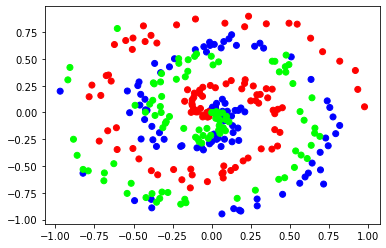

(300, 2)


In [17]:
#An interesting dataset generator
#https://cs231n.github.io/neural-networks-case-study/
def spiral_data(points, classes):
    Xsp = np.zeros((points*classes, 2))
    ysp = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        Xsp[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        ysp[ix] = class_number
    return Xsp, ysp
Xsp, ysp = spiral_data(100,3)

plt.scatter(Xsp[:,0], Xsp[:,1], c = ysp, cmap = 'brg')
plt.show()

print(np.shape(Xsp))


In [18]:
class Layer_Dense:
    def __init__(self ,no_of_inputs,no_of_neurons):
        #to avoid transposing everytime we initialize the shape of weights as:
        self.weights = 0.10 * np.random.randn(no_of_inputs, no_of_neurons)
        self.biases = np.zeros((1, no_of_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
layer1r = Layer_Dense(2,30000)
relu_activation = ReLU() 
layer2r = Layer_Dense(30000,4)
relu_activation2 = ReLU() 
    
layer1r.forward(Xsp)
relu_activation.forward(layer1r.output)
print(layer1r.output)
layer2r.forward(relu_activation.output)


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00018505 -0.00049096 -0.00082357 ... -0.00100411  0.00099747
  -0.00048299]
 [ 0.00345037 -0.00046581 -0.00112395 ... -0.00136377 -0.00135968
  -0.00228521]
 ...
 [-0.01422694  0.04725253  0.07889063 ...  0.09619132 -0.09852563
   0.04448655]
 [ 0.16679159 -0.01328223 -0.03920448 ... -0.04747457 -0.08694082
  -0.1033241 ]
 [ 0.1362424   0.01097627  0.00372799 ...  0.00482622 -0.12115294
  -0.06751738]]


In [19]:
print(relu_activation.output[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00018505 0.         0.         ... 0.         0.00099747 0.        ]
 [0.00345037 0.         0.         ... 0.         0.         0.        ]
 [0.00387199 0.         0.         ... 0.         0.00054463 0.        ]
 [0.00246969 0.         0.         ... 0.         0.00301064 0.        ]]


In [20]:
print(layer2r.output)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.14106982e-02 -1.16045327e-02  1.10892666e-04 -5.29710175e-04]
 [-1.96546620e-02 -3.41316234e-02  3.62514251e-02 -7.51369040e-04]
 ...
 [ 5.11130908e-01 -1.61371532e+00 -2.17462519e+00  1.63026308e+00]
 [-7.08653673e-01 -1.74266853e+00  1.63038337e+00  3.63189574e-01]
 [-1.04433583e-01 -2.04588075e+00  7.94676496e-01  1.05260175e+00]]


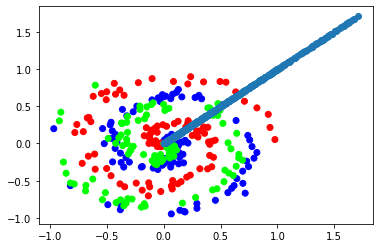

(3, 4)


In [21]:

relu_activation2.forward(layer2r.output)
plt.scatter(Xsp[:,0], Xsp[:,1], c = ysp, cmap = 'brg')
plt.scatter(relu_activation2.output , relu_activation2.output)
plt.show()

print(np.shape(X))